**In this project, I will be using the AirBNB dataset. My objective is to understand various patterns rekated to pricing and it's relationship to various categorical variables. I will explore the following related questions**:

    1. Can the response time be used as a measure of quality based on the corresponding review scores?-This can be used by future clients who want to have a quick check on the quality of service for various hosts.
    
    2. Do superhosts tend to charge more that the non-superhosts? -This can help prospective clients to select which type of host they would like to contact. Additionally, if there is a clear distinction in terms of pricing, it could help predict the pricing
    
    3. What property type are more people interested in and does it affect the pricing?-This can help prospective host to estimate the probability of demand for their proterty


## Libraries

In [43]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

### Load the data

In [2]:
#Load the data
listing_df = pd.read_csv('listings.csv', dtype=str)
calendar_df = pd.read_csv('calendar.csv', dtype=str)
reviews_df = pd.read_csv('reviews.csv', dtype=str)

### Listing Data

In [3]:
print(listing_df.shape)
listing_df.head(2)

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3,3,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289038357184,-122.37102519997765,t,Apartment,Entire home/apt,4,1.0,1,1,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95,10,10,10,10,9,10,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6,6,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.63912312136253,-122.36566646439582,t,Apartment,Entire home/apt,4,1.0,1,1,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96,10,10,10,10,10,10,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
#Subset to the columns needed to answer the questions
new_df = listing_df[['id','host_response_time', 'host_response_rate', 
                    'price', 'guests_included', 'extra_people', 'minimum_nights',
                    'number_of_reviews','review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',
                    'cancellation_policy', 'host_is_superhost', 'property_type']]
new_df.shape

(3818, 18)

In [5]:
new_df['id'].nunique()

3818

### Review Data

In [6]:
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [7]:
#Get number of reviewers per listing
Reviewers_count_df = pd.DataFrame(reviews_df.groupby('listing_id')['reviewer_id'].count())

Reviewers_count_df.rename(columns={"reviewer_id": "Reviewers_Count"}, inplace=True)

Reviewers_count_df.head()

,Reviewers_Count
listing_id,
1000883,18
10012724,2
10020221,1
1002835,6
1003890,72


In [8]:
Reviewers_count_df.describe()

,Reviewers_Count
count,3191.000000
mean,26.590097
std,39.840788
min,1.000000
25%,4.000000
50%,13.000000
75%,31.000000
max,474.000000


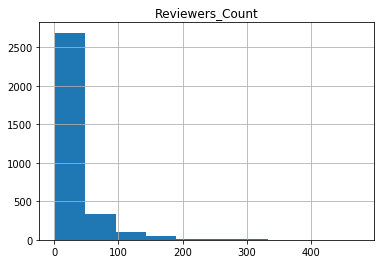

In [9]:
Reviewers_count_df.hist();

Most of the listing have between 0 to 50 reviewers.

### Calendar Data

In [10]:
#Check unique listings
calendar_df['listing_id'].nunique()

3818

In [11]:
calendar_df.shape

(1393570, 4)

#### Median Price per listing

I will get the median price per listing as a price benchmark for the analysis

In [12]:
#Choose only the available listings
available_listings = calendar_df[calendar_df['available']== 't']

#Changing currency to float
from re import sub
from decimal import Decimal

available_listings['price_float'] = available_listings['price'].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))


print(available_listings.shape)
available_listings.head(2)

(934542, 5)


,listing_id,date,available,price,price_float
0,241032,2016-01-04,t,$85.00,85.0
1,241032,2016-01-05,t,$85.00,85.0


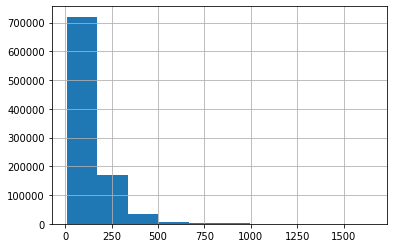

In [13]:
available_listings['price_float'].hist()

In [14]:
#Get the mean and median price for every listing id
mean_median_df = available_listings.groupby('listing_id').agg({'price_float': ['median']})

#Flatten the hierarchical columns
mean_median_df.columns = mean_median_df.columns.get_level_values(1)

print(mean_median_df.shape)

mean_median_df.head(2)

(3723, 1)


,median
listing_id,
10000273,175.0
1000883,100.0


In [15]:
#Merge reviewers count and median price dataframes
merged_df = Reviewers_count_df.merge(mean_median_df, left_index=True, right_index=True)

#Rename the median column
merged_df.rename(columns = {'median': 'Median_Price'}, inplace=True)
print(merged_df.shape)
merged_df.head(2)

(3121, 2)


,Reviewers_Count,Median_Price
listing_id,,
1000883,18,100.0
10012724,2,25.0


In [16]:
#Merge listing dataframe with the median price and reviewer count dataframe
new_df.set_index('id', inplace=True)
new_df_final = merged_df.merge(new_df, right_index=True, left_index=True)
new_df_final.head(2)

,Reviewers_Count,Median_Price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_is_superhost,property_type
1000883,18,100.0,within a few hours,86%,$100.00,3,$0.00,2,18,99,10,10,10,10,10,0.59,moderate,f,House
10012724,2,25.0,within an hour,100%,$25.00,1,$0.00,1,2,100,10,10,10,10,10,2,flexible,f,Apartment


Since I will be using Host response time as a measure of quality, I will remove related null records

In [17]:
last_df = new_df_final.dropna(subset=['host_response_time'])
last_df.shape

(2831, 19)

Subsetting the dataframe and retaining only listings that had more than 5 different reviewers

In [18]:
print(new_df_final.shape)
Clean_df = last_df[last_df['Reviewers_Count']>5]
print(Clean_df.shape)

(3121, 19)
(2051, 19)


In [19]:
#Cleaning up the number columns: Remove percentage sign
#host_response_rate
Clean_df['host_response_rate'] = Clean_df['host_response_rate']. apply(lambda x: float(x.rstrip("%")))

#Remove $ sign
for col in ['price', 'extra_people']:
    Clean_df[col] = Clean_df[col].apply(lambda x: float(Decimal(sub(r'[^\d.]', '', x))))

    
#Change columns to float
list_float = [col for col in Clean_df.columns if col not in ['host_response_time', 'cancellation_policy', 
                                                                  'host_is_superhost', 'property_type']]

for column in list_float:
    Clean_df[column] = Clean_df[column].astype(float)
Clean_df.head(2)

,Reviewers_Count,Median_Price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_is_superhost,property_type
1000883,18.0,100.0,within a few hours,86.0,100.0,3.0,0.0,2.0,18.0,99.0,10.0,10.0,10.0,10.0,10.0,0.59,moderate,f,House
1002835,6.0,135.0,within a day,70.0,135.0,4.0,20.0,2.0,6.0,80.0,8.0,7.0,8.0,10.0,8.0,0.31,strict,f,Apartment


### Business Question 1: Can the response time be used as a measure of quality based on the corresponding review scores?

In [20]:
cols = ['review_scores_rating',
        'review_scores_cleanliness', 'review_scores_checkin', 
        'review_scores_communication', 'review_scores_location',
        'review_scores_value']

In [21]:
#sns.pairplot(more_than_5_rev[cols]);

Reviews Score Rating

In [22]:
Clean_df['review_scores_rating'].max()

100.0

In [23]:
#Normalize  columns and get average
for col in cols:
    Clean_df[col] = Clean_df[col].apply(lambda x: x/Clean_df[col].max())
    
#Get average of the columns above
Clean_df['Average_rating'] = Clean_df[cols].mean(axis=1)
Clean_df.head()

,Reviewers_Count,Median_Price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_is_superhost,property_type,Average_rating
1000883,18.0,100.0,within a few hours,86.0,100.0,3.0,0.0,2.0,18.0,0.99,1.0,1.0,1.0,1.0,1.0,0.59,moderate,f,House,0.998333
1002835,6.0,135.0,within a day,70.0,135.0,4.0,20.0,2.0,6.0,0.80,0.8,0.7,0.8,1.0,0.8,0.31,strict,f,Apartment,0.816667
1003890,72.0,99.0,within an hour,100.0,99.0,3.0,25.0,2.0,72.0,0.93,1.0,1.0,1.0,0.9,0.9,2.20,strict,f,House,0.955000
1009838,56.0,85.0,within a few hours,100.0,85.0,1.0,15.0,2.0,56.0,0.90,0.9,1.0,1.0,0.9,0.9,1.80,flexible,f,House,0.933333
1018204,79.0,69.0,within an hour,100.0,56.0,1.0,5.0,1.0,79.0,0.84,0.9,0.9,0.9,0.9,0.9,2.41,strict,f,Cabin,0.890000


In [24]:
#Get the median rating for every response category
df_relationships = pd.DataFrame(Clean_df.groupby('host_response_time')['Average_rating'].median())
df_relationships

,Average_rating
host_response_time,
a few days or more,0.930000
within a day,0.960000
within a few hours,0.973333
within an hour,0.976667


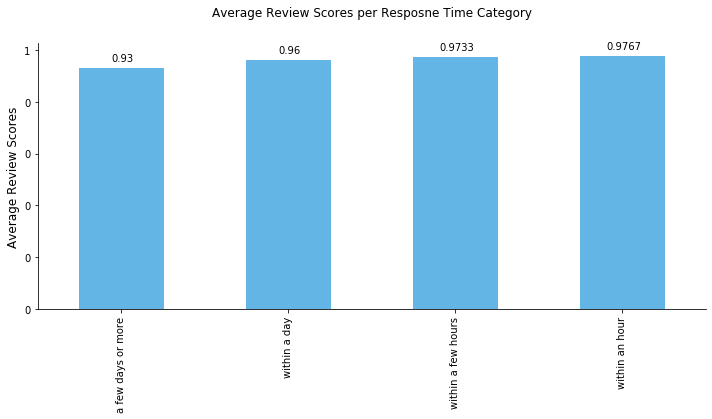

In [25]:

data = df_relationships

frequencies = df_relationships['Average_rating']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(10, 6))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Average Review Scores per Resposne Time Category',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Average Review Scores', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('#62B5E5')

        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = y_value
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str(round(label, 4)),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

In [26]:
# # regex plot
# plt.figure(figsize=(13,7))
# sns.regplot(x=more_than_5_rev['host_response_rate'], y=more_than_5_rev['Average_rating']);

### Business Question 2: Do superhosts tend to charge more that the non-superhosts?

In [27]:
Clean_df.head(2)

,Reviewers_Count,Median_Price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_is_superhost,property_type,Average_rating
1000883,18.0,100.0,within a few hours,86.0,100.0,3.0,0.0,2.0,18.0,0.99,1.0,1.0,1.0,1.0,1.0,0.59,moderate,f,House,0.998333
1002835,6.0,135.0,within a day,70.0,135.0,4.0,20.0,2.0,6.0,0.80,0.8,0.7,0.8,1.0,0.8,0.31,strict,f,Apartment,0.816667


In [28]:
Clean_df['host_is_superhost'].value_counts()

f    1407
t     644
Name: host_is_superhost, dtype: int64

In [29]:
Clean_df['Median_Price'].describe()

count    2051.000000
mean      126.480010
std        90.115228
min        25.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1450.000000
Name: Median_Price, dtype: float64

In [30]:
#subset the 2 dataframes based on superhosts
superhost_t_df = Clean_df[Clean_df['host_is_superhost'] == 't']
superhost_f_df = Clean_df[Clean_df['host_is_superhost'] == 'f']

In [31]:
#Median prices for both dataframes
print(f"Median for superhosts: {superhost_t_df['Median_Price'].median()}")
print(f"Mean for superhosts: {superhost_t_df['Median_Price'].mean()}")
print(f"Median for non-superhosts: {superhost_f_df['Median_Price'].median()}")
print(f"Mean for non-superhosts: {superhost_f_df['Median_Price'].mean()}")

Median for superhosts: 105.0
Mean for superhosts: 131.7996894409938
Median for non-superhosts: 100.0
Mean for non-superhosts: 124.04513148542999


Text(0.5, 1.0, 'Superhost vs non superhost')

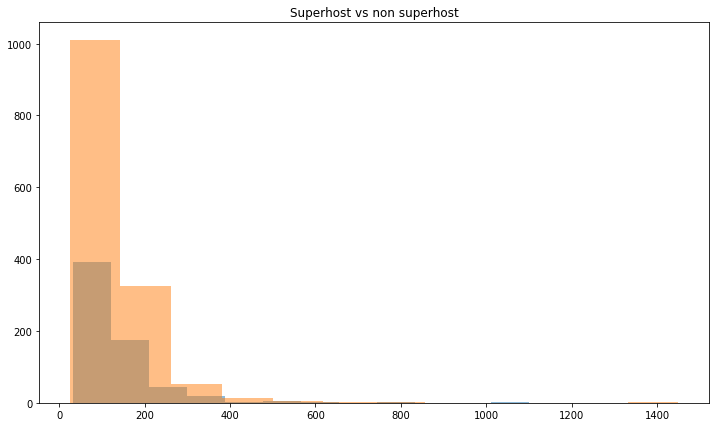

In [32]:
#Histogram

fig, ax = plt.subplots(1, sharex='col', sharey='row', figsize=(12,7))
#ax = ax.ravel()


ax.hist(superhost_t_df['Median_Price'], bins=12, alpha=0.5)
ax.hist(superhost_f_df['Median_Price'], bins=12, alpha=0.5)
ax.set_title("Superhost vs non superhost")
#ax.legend(loc='upper left')


On  a first look, it doesnt seem like there is a difference in pricing when it comes to whether a host is superhost or not. The distribution of the prices look the same for the two.

In [33]:
def get_normalized_val_counts(df, col):
    '''
    INPUTS
        df-a dataframe
        col- a column that we want to calculate the value_counts
    OUTPUT
        a dataframe of value_counts of col
    '''
    
    #Get the value counts of the col and edit the column names
    val_count_df = pd.DataFrame(df[col].value_counts(dropna=False).reset_index())
    val_count_df.rename(columns={'index': col, col: 'count'}, inplace=True)
    val_count_df.set_index(col, inplace=True)
    props_val_count = val_count_df/val_count_df.sum()
    
    return props_val_count

In [34]:
#Get listings for superhosts and non-superhosts
superhosts_list = superhost_t_df.index.tolist()
non_superhosts_list =superhost_f_df.index.unique().tolist()

#
dict_bin_cols = {'host_is_superhost': superhosts_list}

def choose_col_cat(bin_col, cat_col):
    '''
    INPUT:
        bin_col-a binary column that will be used to disect other categorical variables
        cat_col - a categorical column that you want to disect
        
    OUTPUT: A bar presentation of valuecounts percentages of dataframes separated by the bin_col values
    '''
    
    #Separate the dataframes where one bin col is present or absent
    element_present = Clean_df[Clean_df.index.isin(dict_bin_cols[bin_col])]
    element_absent = Clean_df[~Clean_df.index.isin(dict_bin_cols[bin_col])]
    
    #Create the percentages
    element_true_perc = get_normalized_val_counts(element_present, cat_col)
    element_false_perc = get_normalized_val_counts(element_absent, cat_col)
    
    #merge the 2 dataframes for comparison
    comp_df = pd.merge(element_true_perc, element_false_perc, left_index = True, right_index=True)
    comp_df.columns = [bin_col + '_True', bin_col + '_False']
    comp_df['Diff_Vals'] = comp_df[bin_col + '_True'] - comp_df[bin_col + '_False']
    #return comp_df.style.bar(subset=['Diff_Vals'], align='mid', color = ['#d65f5f', '#5fba7d'])
    return comp_df

In [35]:
Clean_df['win_Median_Price'] = Clean_df['Median_Price']
Clean_df.loc[Clean_df['win_Median_Price']>200 , 'win_Median_Price'] = 201

#Create median prices category
bins = [i for i in range(0,240,20)]

names = [str(i) + " to " + str(bins[ind+1]) + ' Dollars' for i,ind in zip(bins, list(range(len(bins)))) if ind <10] + ["More than 200 Dollars"]

d = dict(enumerate(names, 1))

Clean_df['Price_Category'] = np.vectorize(d.get)(np.digitize(Clean_df['win_Median_Price'], bins))

In [60]:
price_df = choose_col_cat('host_is_superhost', 'Price_Category')
price_df['sort'] = price_df.index
price_df['sort'] = price_df['sort'].apply(lambda x: x.split(" ")[0])
price_df['sort'] = price_df['sort'].str.replace("More", str(200))
price_df['sort'] = price_df['sort'].astype(int)
price_df = price_df.sort_values(by =['sort'], ascending=[True])
price_df = price_df.drop('sort', axis=1)

price_df = price_df.rename(columns = {'host_is_superhost_True': 'Superhost \n(Percentage)', 
                                      'host_is_superhost_False': 'Non-Superhosts \n(Percentage)',
                                      'Diff_Vals': "Proportional Difference"})
for col in ['Superhost \n(Percentage)', 'Non-Superhosts \n(Percentage)', 'Proportional Difference']:
    price_df[col] = price_df[col].apply(lambda x: int(round((x*100),0)))
    #price_df[col] = price_df[col]
price_df.style.bar(subset=['Proportional Difference'], align='mid', color = ['#d65f5f', '#5fba7d'])

,Superhost (Percentage),Non-Superhosts (Percentage),Proportional Difference
Price_Category,,,
20 to 40 Dollars,0,4,-3
40 to 60 Dollars,6,12,-6
60 to 80 Dollars,17,15,2
80 to 100 Dollars,22,18,4
100 to 120 Dollars,12,11,1
120 to 140 Dollars,11,10,1
140 to 160 Dollars,9,8,0
160 to 180 Dollars,5,5,1
180 to 200 Dollars,3,4,-1


Based on the above, there could be a scant evidence that superhosts tend to charge slightly higher price than non-superhosts

### Business Question 3: What property type are more people interested in and does it affect the pricing?

In [135]:
Clean_df.head(2)

,Reviewers_Count,Median_Price,host_response_time,host_response_rate,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,cancellation_policy,host_is_superhost,property_type,Average_rating,Price_Category,win_Median_Price
1000883,18.0,100.0,within a few hours,86.0,100.0,3.0,0.0,2.0,18.0,0.99,1.0,1.0,1.0,1.0,1.0,0.59,moderate,f,House,0.998333,100 to 120 Dollars,100.0
1002835,6.0,135.0,within a day,70.0,135.0,4.0,20.0,2.0,6.0,0.80,0.8,0.7,0.8,1.0,0.8,0.31,strict,f,Apartment,0.816667,120 to 140 Dollars,135.0


I will first check the popularity of each property type by using the number of reviewers

In [61]:
count_popularity = Clean_df.groupby('property_type').agg({'Reviewers_Count': 'median', 
                                              'reviews_per_month': 'median'})

count_popularity.sort_values(by='Reviewers_Count', ascending=False, inplace=True)

In [144]:
count_popularity.head()

,Reviewers_Count,reviews_per_month
property_type,,
Camper/RV,80.0,3.690
Cabin,66.0,3.530
Other,48.5,3.505
Loft,39.0,3.320
House,25.0,2.280


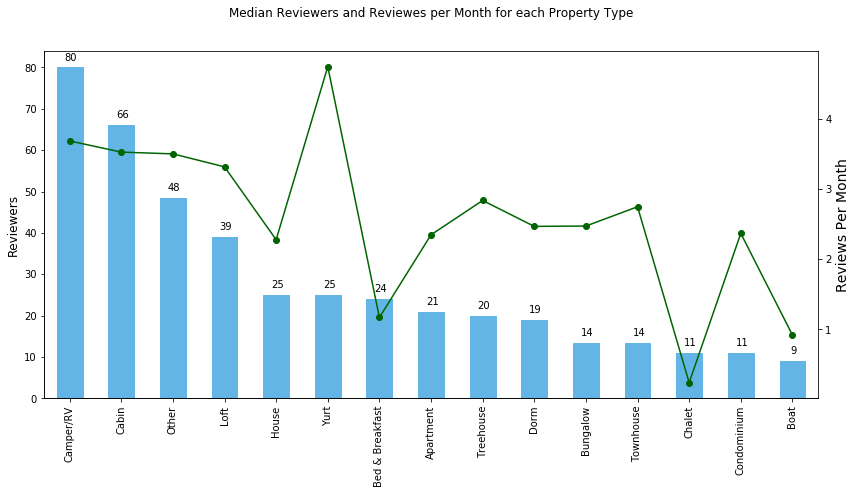

In [62]:
data = count_popularity

frequencies = count_popularity['Reviewers_Count']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(12, 7))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Median Reviewers and Reviewes per Month for each Property Type',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Reviewers', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('#62B5E5')
        
        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = "{:.0f}".format(y_value)
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str("{:,}".format(int(label))),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.
            
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(count_popularity.index, count_popularity["reviews_per_month"], color="darkgreen", marker="o")
ax2.set_ylabel("Reviews Per Month",color="black",fontsize=14)

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

This chart shows that generally, Camper/RV, Cabin, and Other were some of the most popular property types based on the number of reviewers. The reviews per month shows a slightly different picture and can be interpreted as even if some other properties like Yurt had fewer reviewers, they were more enthusiastic and could have posted multiple reviews.

Pricing

In [41]:
pricing_df = pd.DataFrame(Clean_df.groupby('property_type')['price'] \
                     .median()) \
                     .rename(columns={'price': 'Median Price'}) \
                     .sort_values(by='Median Price', ascending=False)

In [42]:
#merge the 2 dataframes
merged_prop_type = pricing_df.merge(count_popularity, left_index=True, right_index=True)
merged_prop_type = merged_prop_type.sort_values(by='Reviewers_Count', ascending=False)
merged_prop_type.head()

,Median Price,Reviewers_Count,reviews_per_month
property_type,,,
Camper/RV,75.0,80.0,3.690
Cabin,95.0,66.0,3.530
Other,72.5,48.5,3.505
Loft,102.5,39.0,3.320
Yurt,100.0,25.0,4.750


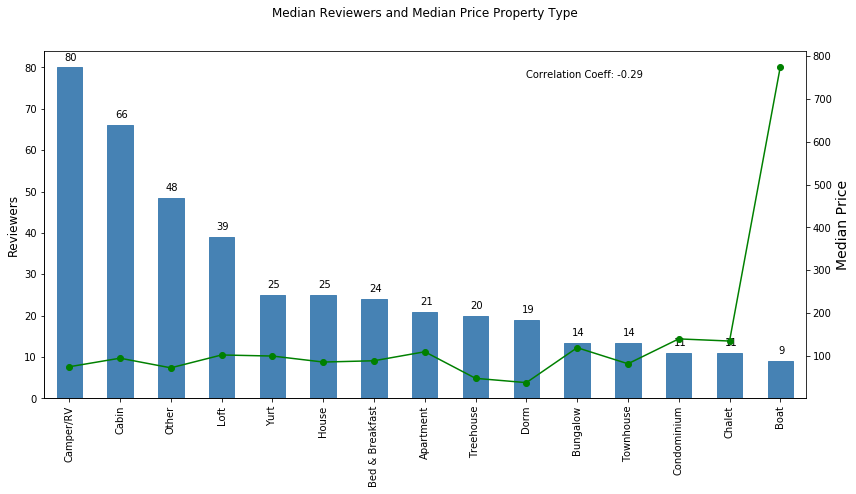

In [43]:
data = merged_prop_type

frequencies = merged_prop_type['Reviewers_Count']

#Creating a series for the data and making the index labels
freq_series = pd.Series(frequencies)

x_labels = data.index

#Plot the figure
# Plot the figure.
plt.subplots(figsize=(12, 7))
ax = freq_series.plot(kind='bar', legend=False, color = ['#17618C', '#62B5E5'])
ax.set_title('Median Reviewers and Median Price Property Type',fontsize=12, y=1.08)
ax.set_xlabel('')
ax.set_ylabel('Reviewers', fontsize=12)
ax.set_xticklabels(x_labels, fontsize=10, rotation=90)

#ax.set_yticklabels(freq_series, fontsize=16, rotation=0)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Putting commas to thousands figures on the y axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#Set y limits

#ax.set_ylim(0, 6500)

def add_value_labels(ax, spacing=5):

    """Add labels to the end of each bar in a bar chart.
    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for patch_bar in ax.patches:
        patch_bar.set_color('steelblue')
        
        # Get X and Y placement of label from patch_bar.
        y_value = patch_bar.get_height()
        x_value = patch_bar.get_x() + patch_bar.get_width() / 2
        
        # Number of points between bar and label. Change to your liking.
        space = spacing

        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with no decimals
        label = "{:.0f}".format(y_value)
        #label = y_value.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
        # Create annotation
        ax.annotate(
            str("{:,}".format(int(label))),                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(1.4, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            color ='black', rotation=0, fontsize=10) # Vertically align label differently for
                                        # positive and negative values.
            
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merged_prop_type.index, merged_prop_type["Median Price"], color="g", marker="o")
ax2.set_ylabel("Median Price",color="black",fontsize=14)

plt.text(9,750, f"Correlation Coeff: {round(merged_prop_type['Median Price'].corr(merged_prop_type['Reviewers_Count']), 2)}")

# Call the function above.
add_value_labels(ax)
plt.tight_layout()

As shown in the chart, the Median Price and number of Reviewers per property type are polar oppisites. An increases in popularity of a property type has a corresponding decrease in associated price. This shows that more people are attracted to the low priced listings.

In [44]:
merged_prop_type['Median Price'].corr(merged_prop_type['Reviewers_Count'])

-0.2904479116315599

Even the correlation coefficient above shows the negative relationship